
**Exploring Accessibility for Disabled People in the City of Melbourne**

**Authored by**: Liny Jose Alias

**Duration**: 90 mins

**Level**: Intermediate

**Pre-requisite Skills**: Python, Data Visualization, Data Wrangling, Machine Learning Models,Deep Learning

**Scenario**
As a healthcare worker, I would like to know the nearest public toilets with facilities and accessibility for my disabled patients.

As a healthcare worker, i would like to know the areas friendly for visually impaired people.

***Project Objective, Overview & Research***

This use case aims to evaluate the accessibility of urban infrastructure for disabled individuals in the City of Melbourne. By analyzing datasets that include tactile ground surface indicators (TGSI), public toilets, and train station accessibility information, the City of Melbourne can identify areas where accessibility improvements are needed. The goal is to enhance the inclusiveness and navigability of the city for people with disabilities.

Dataset 1:
https://data.melbourne.vic.gov.au/explore/dataset/tactile-ground-surface-indicator/information/
This dataset contains tactile ground surface indicators(TGSI) that are located within the central business district of the City of Melbourne.
TGSI are used to help vision impaired people navigate the urban environment to avoid hazards.

Dataset 2:
https://data.melbourne.vic.gov.au/explore/dataset/public-toilets/information/
Public toilets known about or operated by the council. 

Dataset 3:
https://data.melbourne.vic.gov.au/explore/dataset/metro-train-stations-with-accessibility-information/information/
This data contains locations of train stations and their accessibility information, such as hearing aid information.


In [142]:
#Importing core libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder

Loading the datasets through API

In [144]:
import requests
import pandas as pd
from io import StringIO

# Function to collect data
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    format = 'csv'
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        # Try to determine the delimiter by reading the first few lines
        delimiter = ','
        sample_lines = url_content.split('\n')[:5]
        for line in sample_lines:
            if ';' in line:
                delimiter = ';'
                break
        df = pd.read_csv(StringIO(url_content), delimiter=delimiter)
        print(f'Successfully retrieved dataset: {dataset_id}')
        return df
    else:
        print(f'Request failed with status code {response.status_code}')
        return None

# Dataset IDs
dataset_ids = {
    'tactile_indicator': 'tactile-ground-surface-indicator',
    'public_toilets': 'public-toilets',
    'train_station': 'metro-train-stations-with-accessibility-information'
    
}

# Retrieving and printing data for each dataset
datasets = {}
for name, dataset_id in dataset_ids.items():
    print(f"\nRetrieving data for {name}...")
    df = collect_data(dataset_id)
    if df is not None:
        datasets[name] = df
        print(f"The {name} dataset contains {len(df)} records.")
        print(df.head(5))
    else:
        print(f"Unable to retrieve the {name} dataset.")

# Creating dataframes
tgsi_df = datasets.get('tactile_indicator')
toilets_df = datasets.get('public_toilets')
stations_df = datasets.get('train_station')


Retrieving data for tactile_indicator...
Successfully retrieved dataset: tactile-ground-surface-indicator
The tactile_indicator dataset contains 357 records.
   asset_number                             asset_description  road_segment  \
0       1506714        TGSI - Flinders Street/ Spencer Street       20224.0   
1       1506782   TGSI - William Street/ Little Bourke Street           NaN   
2       1506787  TGSI - William Street/ Little Collins Street       20182.0   
3       1507021         TGSI - Swanston Street/ Flinders Lane       20126.0   
4       1506784  TGSI - William Street/ Little Collins Street       20183.0   

         lat         lon                                 location  
0 -37.820894  144.955183   -37.82089377224977, 144.95518315024808  
1 -37.814542  144.957883   -37.81454165692627, 144.95788286206448  
2 -37.816679  144.958800    -37.81667919572513, 144.9587999921556  
3 -37.816464  144.967126  -37.816463667054634, 144.96712585544967  
4 -37.816552  144.958728  

Viewing the datasets

In [146]:
#Displaying the first 5 rows of the dataframe
tgsi_df.head()

,asset_number,asset_description,road_segment,lat,lon,location
0,1506714,TGSI - Flinders Street/ Spencer Street,20224.0,-37.820894,144.955183,"-37.82089377224977, 144.95518315024808"
1,1506782,TGSI - William Street/ Little Bourke Street,NaN,-37.814542,144.957883,"-37.81454165692627, 144.95788286206448"
2,1506787,TGSI - William Street/ Little Collins Street,20182.0,-37.816679,144.958800,"-37.81667919572513, 144.9587999921556"
3,1507021,TGSI - Swanston Street/ Flinders Lane,20126.0,-37.816464,144.967126,"-37.816463667054634, 144.96712585544967"
4,1506784,TGSI - William Street/ Little Collins Street,20183.0,-37.816552,144.958728,"-37.81655161019709, 144.95872841830132"


In [147]:
#Displaying the first 5 rows of the dataframe
toilets_df.head()

,name,female,male,wheelchair,operator,baby_facil,lat,lon
0,Public Toilet - Toilet 140 - Queensberry Stree...,no,yes,no,City of Melbourne,no,-37.803995,144.959091
1,Public Toilet - Toilet 6 - Elizabeth Street (T...,yes,no,no,City of Melbourne,no,-37.813838,144.963097
2,Public Toilet - Toilet 142 - Queensberry Stree...,no,yes,no,City of Melbourne,no,-37.804640,144.962850
3,Public Toilet - Royal Park Brens Pavilion,yes,yes,no,City of Melbourne,no,-37.786221,144.955001
4,Public Toilet - Toilet 177 - Bellair Street (O...,yes,yes,yes,City of Melbourne,no,-37.793732,144.930352


In [148]:
#Displaying the first 5 rows of the dataframe
stations_df.head()

,geo_point_2d,geo_shape,he_loop,lift,pids,station
0,"-37.77839599999999, 145.031251","{""coordinates"": [145.031251, -37.7783959999999...",No,No,Dot Matrix,Alphington
1,"-37.86724899999996, 144.830604","{""coordinates"": [144.830604, -37.8672489999999...",No,No,LCD,Altona
2,"-37.761897999999974, 144.96056099999998","{""coordinates"": [144.96056099999998, -37.76189...",No,No,No,Anstey
3,"-37.82241099999999, 145.045617","{""coordinates"": [145.045617, -37.8224109999999...",No,No,No,Auburn
4,"-37.73345899999998, 144.96274700000004","{""coordinates"": [144.96274700000004, -37.73345...",No,No,No,Batman


Removing unneccessary columns

In [150]:
tgsi_df = tgsi_df.drop(['location'], axis=1) # as we already have lat and lon in separate columns
toilets_df = toilets_df.drop(['operator', 'baby_facil'], axis=1)
stations_df = stations_df.drop(['geo_shape'], axis=1)

In [151]:
# Display the first few rows of each dataset to verify the changes
print("TGSI Dataset:")
print(tgsi_df.head())
print("\nPublic Toilets Dataset:")
print(toilets_df.head())
print("\nMetro Train Stations Dataset:")
print(stations_df.head())

TGSI Dataset:
   asset_number                             asset_description  road_segment  \
0       1506714        TGSI - Flinders Street/ Spencer Street       20224.0   
1       1506782   TGSI - William Street/ Little Bourke Street           NaN   
2       1506787  TGSI - William Street/ Little Collins Street       20182.0   
3       1507021         TGSI - Swanston Street/ Flinders Lane       20126.0   
4       1506784  TGSI - William Street/ Little Collins Street       20183.0   

         lat         lon  
0 -37.820894  144.955183  
1 -37.814542  144.957883  
2 -37.816679  144.958800  
3 -37.816464  144.967126  
4 -37.816552  144.958728  

Public Toilets Dataset:
                                                name female male wheelchair  \
0  Public Toilet - Toilet 140 - Queensberry Stree...     no  yes         no   
1  Public Toilet - Toilet 6 - Elizabeth Street (T...    yes   no         no   
2  Public Toilet - Toilet 142 - Queensberry Stree...     no  yes         no   
3       

Checking for Missing values

In [153]:
#Printing the feature names with the number of missing entries
print("Null values in individual columns\n",tgsi_df.isnull().sum())


Null values in individual columns
 asset_number          0
asset_description     0
road_segment         41
lat                   0
lon                   0
dtype: int64


In [154]:
#Printing the feature names with the number of missing entries
print("Null values in individual columns\n",toilets_df.isnull().sum())

Null values in individual columns
 name          0
female        1
male          1
wheelchair    1
lat           0
lon           0
dtype: int64


In [155]:
#Printing the feature names with the number of missing entries
print("Null values in individual columns\n",stations_df.isnull().sum())

Null values in individual columns
 geo_point_2d    0
he_loop         0
lift            0
pids            0
station         0
dtype: int64


Handling Missing values

In [157]:
# Drop rows with NaN values
tgsi_df_cleaned = tgsi_df.dropna() #as road_segment is not a continous variable, dropping the rows instead of filling it

# Print the number of null values after dropping
print("\nNull values after dropping:")
print(tgsi_df_cleaned.isnull().sum())

# Print the total number of rows after dropping
print(f"\nTotal number of rows after dropping: {len(tgsi_df_cleaned)}")

# Calculate and print the number and percentage of rows dropped
rows_dropped = len(tgsi_df) - len(tgsi_df_cleaned)
percentage_dropped = (rows_dropped / len(tgsi_df)) * 100

print(f"\nNumber of rows dropped: {rows_dropped}")
print(f"Percentage of rows dropped: {percentage_dropped:.2f}%")

# Verify the changes
print("\nFirst few rows of the cleaned dataset:")
print(tgsi_df_cleaned.head())

#Reassigning the cleaned dataframe back to tgsi_df
tgsi_df = tgsi_df_cleaned


Null values after dropping:
asset_number         0
asset_description    0
road_segment         0
lat                  0
lon                  0
dtype: int64

Total number of rows after dropping: 316

Number of rows dropped: 41
Percentage of rows dropped: 11.48%

First few rows of the cleaned dataset:
   asset_number                             asset_description  road_segment  \
0       1506714        TGSI - Flinders Street/ Spencer Street       20224.0   
2       1506787  TGSI - William Street/ Little Collins Street       20182.0   
3       1507021         TGSI - Swanston Street/ Flinders Lane       20126.0   
4       1506784  TGSI - William Street/ Little Collins Street       20183.0   
6       1506881            TGSI - Bourke Street/ Queen Street       20085.0   

         lat         lon  
0 -37.820894  144.955183  
2 -37.816679  144.958800  
3 -37.816464  144.967126  
4 -37.816552  144.958728  
6 -37.814815  144.960767  


In [158]:
# Drop rows with NaN values
toilets_df_cleaned = toilets_df.dropna()

# Print the number of null values after dropping
print("\nNull values after dropping:")
print(toilets_df_cleaned.isnull().sum())

# Print the total number of rows after dropping
print(f"\nTotal number of rows after dropping: {len(toilets_df_cleaned)}")

# Calculate and print the number and percentage of rows dropped
rows_dropped = len(toilets_df) - len(toilets_df_cleaned)
percentage_dropped = (rows_dropped / len(toilets_df)) * 100

print(f"\nNumber of rows dropped: {rows_dropped}")
print(f"Percentage of rows dropped: {percentage_dropped:.2f}%")

# Verify the changes
print("\nFirst few rows of the cleaned dataset:")
print(toilets_df_cleaned.head())

#Reassigning the cleaned dataframe back to toilets_df
toilets_df = toilets_df_cleaned


Null values after dropping:
name          0
female        0
male          0
wheelchair    0
lat           0
lon           0
dtype: int64

Total number of rows after dropping: 73

Number of rows dropped: 1
Percentage of rows dropped: 1.35%

First few rows of the cleaned dataset:
                                                name female male wheelchair  \
0  Public Toilet - Toilet 140 - Queensberry Stree...     no  yes         no   
1  Public Toilet - Toilet 6 - Elizabeth Street (T...    yes   no         no   
2  Public Toilet - Toilet 142 - Queensberry Stree...     no  yes         no   
3          Public Toilet - Royal Park Brens Pavilion    yes  yes         no   
4  Public Toilet - Toilet 177 - Bellair Street (O...    yes  yes        yes   

         lat         lon  
0 -37.803995  144.959091  
1 -37.813838  144.963097  
2 -37.804640  144.962850  
3 -37.786221  144.955001  
4 -37.793732  144.930352  


In [159]:
#Displaying the first 5 rows of the dataframe
tgsi_df.head()

,asset_number,asset_description,road_segment,lat,lon
0,1506714,TGSI - Flinders Street/ Spencer Street,20224.0,-37.820894,144.955183
2,1506787,TGSI - William Street/ Little Collins Street,20182.0,-37.816679,144.958800
3,1507021,TGSI - Swanston Street/ Flinders Lane,20126.0,-37.816464,144.967126
4,1506784,TGSI - William Street/ Little Collins Street,20183.0,-37.816552,144.958728
6,1506881,TGSI - Bourke Street/ Queen Street,20085.0,-37.814815,144.960767


In [160]:
toilets_df.head()

,name,female,male,wheelchair,lat,lon
0,Public Toilet - Toilet 140 - Queensberry Stree...,no,yes,no,-37.803995,144.959091
1,Public Toilet - Toilet 6 - Elizabeth Street (T...,yes,no,no,-37.813838,144.963097
2,Public Toilet - Toilet 142 - Queensberry Stree...,no,yes,no,-37.804640,144.962850
3,Public Toilet - Royal Park Brens Pavilion,yes,yes,no,-37.786221,144.955001
4,Public Toilet - Toilet 177 - Bellair Street (O...,yes,yes,yes,-37.793732,144.930352


In [161]:
stations_df.head()

,geo_point_2d,he_loop,lift,pids,station
0,"-37.77839599999999, 145.031251",No,No,Dot Matrix,Alphington
1,"-37.86724899999996, 144.830604",No,No,LCD,Altona
2,"-37.761897999999974, 144.96056099999998",No,No,No,Anstey
3,"-37.82241099999999, 145.045617",No,No,No,Auburn
4,"-37.73345899999998, 144.96274700000004",No,No,No,Batman


Converting the categorical columns in the Public toilet dataset to numerical variables using LabelEncoder

In [163]:
# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to encode
columns_to_encode = ['female', 'male', 'wheelchair']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    toilets_df[column] = le.fit_transform(toilets_df[column])

# Display the first few rows to verify the change
print(toilets_df[['name', 'female', 'male', 'wheelchair']].head())

# If you want to see the mapping
print("\nEncoding mapping:")
for column in columns_to_encode:
    print(f"{column}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

                                                name  female  male  wheelchair
0  Public Toilet - Toilet 140 - Queensberry Stree...       1     2           1
1  Public Toilet - Toilet 6 - Elizabeth Street (T...       2     1           1
2  Public Toilet - Toilet 142 - Queensberry Stree...       1     2           1
3          Public Toilet - Royal Park Brens Pavilion       2     2           1
4  Public Toilet - Toilet 177 - Bellair Street (O...       2     2           2

Encoding mapping:
female: {'U': 0, 'no': 1, 'yes': 2}
male: {'U': 0, 'no': 1, 'yes': 2}
wheelchair: {'U': 0, 'no': 1, 'yes': 2}


In [164]:
toilets_df.head()

,name,female,male,wheelchair,lat,lon
0,Public Toilet - Toilet 140 - Queensberry Stree...,1,2,1,-37.803995,144.959091
1,Public Toilet - Toilet 6 - Elizabeth Street (T...,2,1,1,-37.813838,144.963097
2,Public Toilet - Toilet 142 - Queensberry Stree...,1,2,1,-37.804640,144.962850
3,Public Toilet - Royal Park Brens Pavilion,2,2,1,-37.786221,144.955001
4,Public Toilet - Toilet 177 - Bellair Street (O...,2,2,2,-37.793732,144.930352


**Exploratory Data Analysis**

Analyzing the patterns in Tactile Ground Surface Indicator Distribution

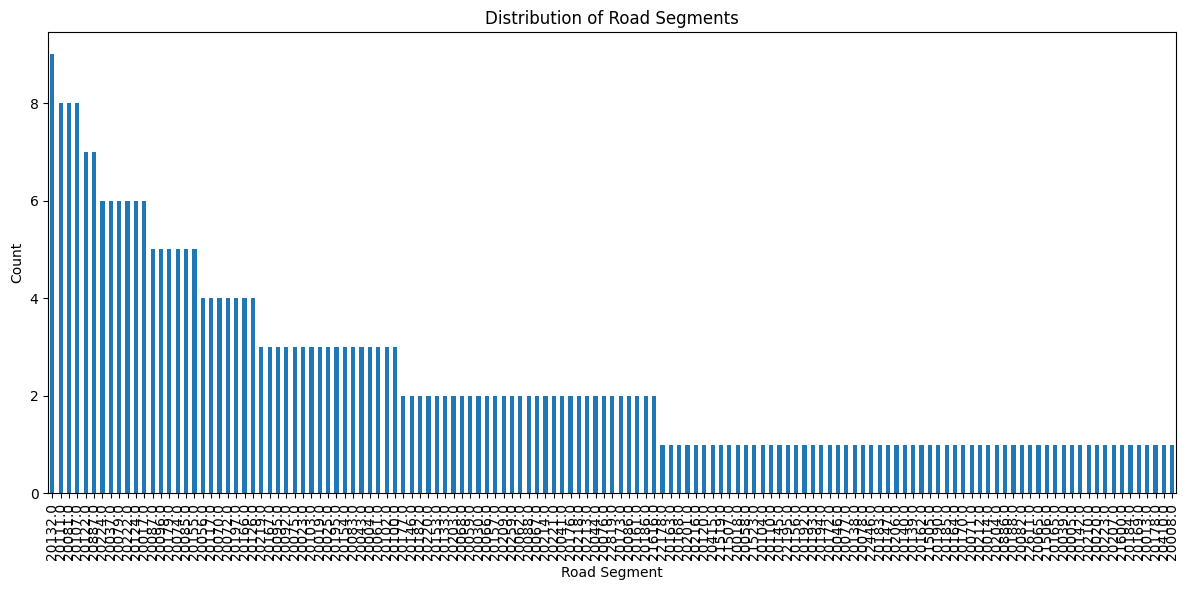

In [167]:
# Distribution of road segments
plt.figure(figsize=(12, 6))
tgsi_df['road_segment'].value_counts().plot(kind='bar')
plt.title('Distribution of Road Segments')
plt.xlabel('Road Segment')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

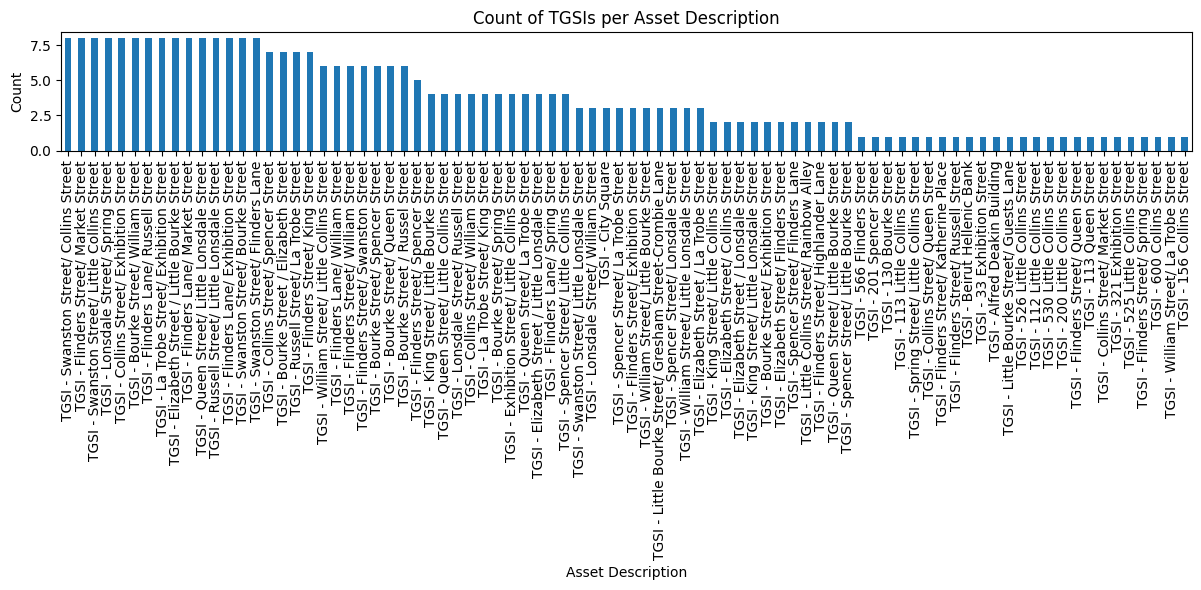

In [168]:
# Count of TGSIs per asset description
plt.figure(figsize=(12, 6))
tgsi_df['asset_description'].value_counts().plot(kind='bar')
plt.title('Count of TGSIs per Asset Description')
plt.xlabel('Asset Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

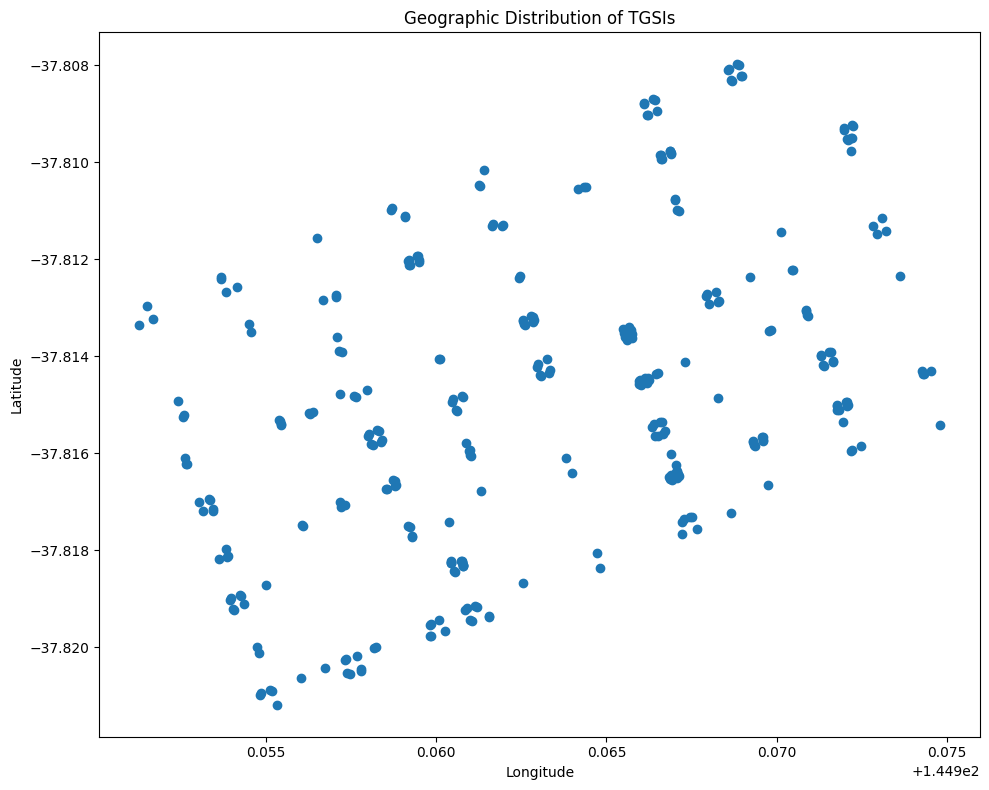

In [169]:
# Scatter plot of lat vs lon
plt.figure(figsize=(10, 8))
plt.scatter(tgsi_df['lon'], tgsi_df['lat'])
plt.title('Geographic Distribution of TGSIs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

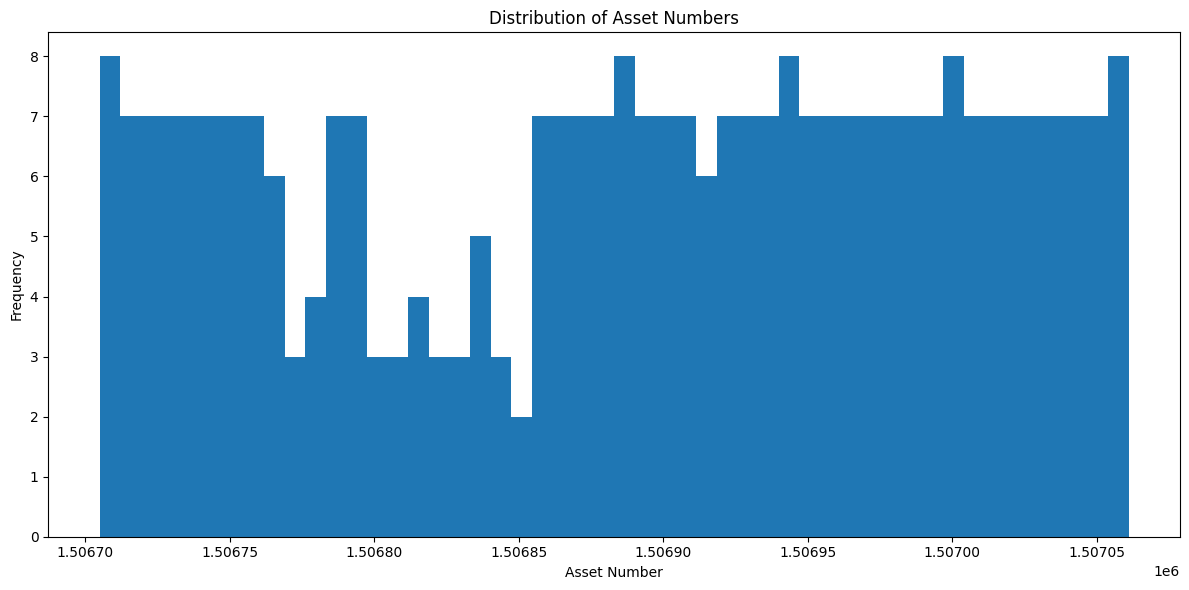

In [170]:
# Additional analysis: Checking for any patterns in asset numbers
tgsi_df['asset_number'] = pd.to_numeric(tgsi_df['asset_number'])
plt.figure(figsize=(12, 6))
plt.hist(tgsi_df['asset_number'], bins=50)
plt.title('Distribution of Asset Numbers')
plt.xlabel('Asset Number')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Analyzing accessibility in the public toilets.

In [172]:
# Basic information about the dataset
print(toilets_df.info())
print("\nSummary statistics:")
print(toilets_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 0 to 73
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        73 non-null     object 
 1   female      73 non-null     int64  
 2   male        73 non-null     int64  
 3   wheelchair  73 non-null     int64  
 4   lat         73 non-null     float64
 5   lon         73 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.0+ KB
None

Summary statistics:
          female       male  wheelchair        lat         lon
count  73.000000  73.000000   73.000000  73.000000   73.000000
mean    1.821918   1.917808    1.643836 -37.810780  144.961775
std     0.419738   0.322896    0.510171   0.014282    0.014911
min     0.000000   0.000000    0.000000 -37.845207  144.921106
25%     2.000000   2.000000    1.000000 -37.819406  144.955578
50%     2.000000   2.000000    2.000000 -37.812241  144.962923
75%     2.000000   2.000000    2.000000 -37.80

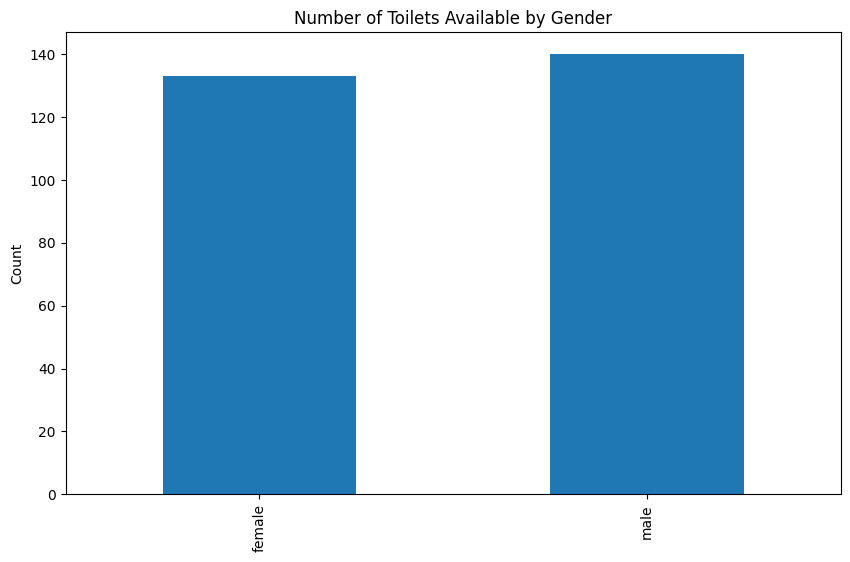

In [173]:
# Count of toilets by gender availability
gender_counts = toilets_df[['female', 'male']].sum()
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar')
plt.title('Number of Toilets Available by Gender')
plt.ylabel('Count')
plt.show()

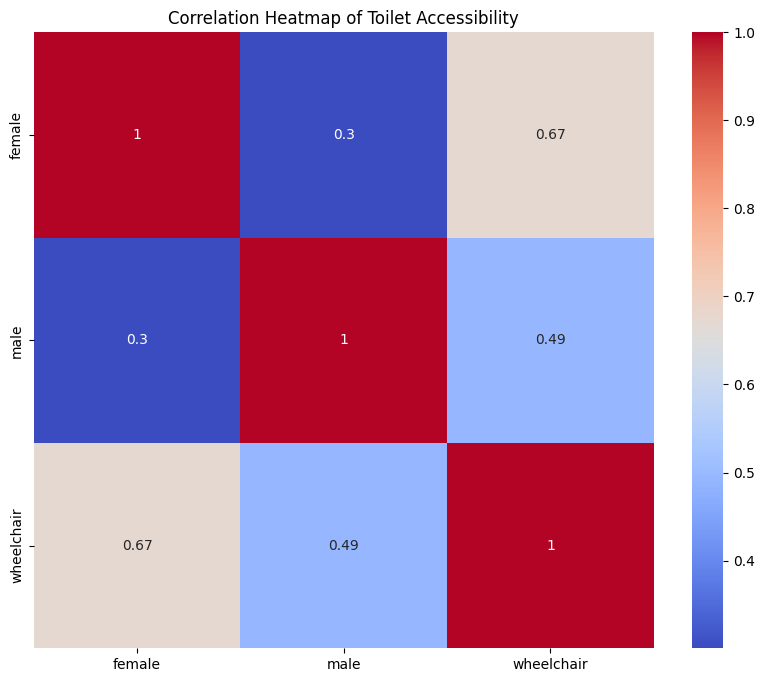

In [174]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(toilets_df[['female', 'male', 'wheelchair']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Toilet Accessibility')
plt.show()

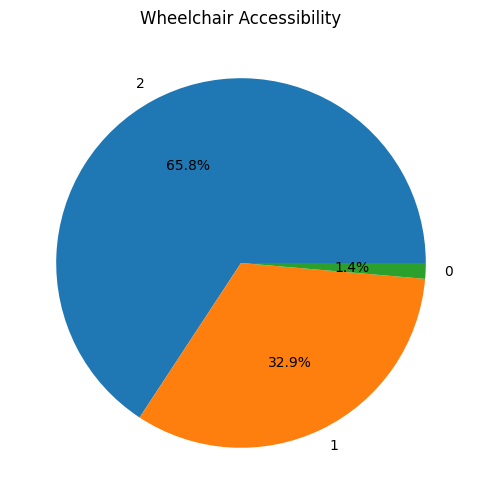

In [175]:
# Wheelchair accessibility
wheelchair_count = toilets_df['wheelchair'].value_counts()
plt.figure(figsize=(8, 6))
wheelchair_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Wheelchair Accessibility')
plt.ylabel('')
plt.show()

In [176]:
# Toilets with all facilities
all_facilities = toilets_df[(toilets_df['female'] == 2) & 
                            (toilets_df['male'] == 2) & 
                            (toilets_df['wheelchair'] == 2)]
print(f"\nNumber of toilets with all facilities: {len(all_facilities)}")


Number of toilets with all facilities: 48


In [177]:
# Top 5 locations with most facilities
print("\nTop 5 locations with most facilities:")
print(toilets_df[['name', 'female', 'male', 'wheelchair']].sort_values(
    by=['female', 'male', 'wheelchair'], ascending=False).head())


Top 5 locations with most facilities:
                                                name  female  male  wheelchair
4  Public Toilet - Toilet 177 - Bellair Street (O...       2     2           2
5  Public Toilet - Toilet 118 - Fitzroy Gardens (...       2     2           2
6  Public Toilet - Toilet 34 - Franklin Street (O...       2     2           2
7  Public Toilet - Town Hall Melbourne (200 Colli...       2     2           2
8  Public Toilet - Toilet 131 - Royal Park (Flemi...       2     2           2


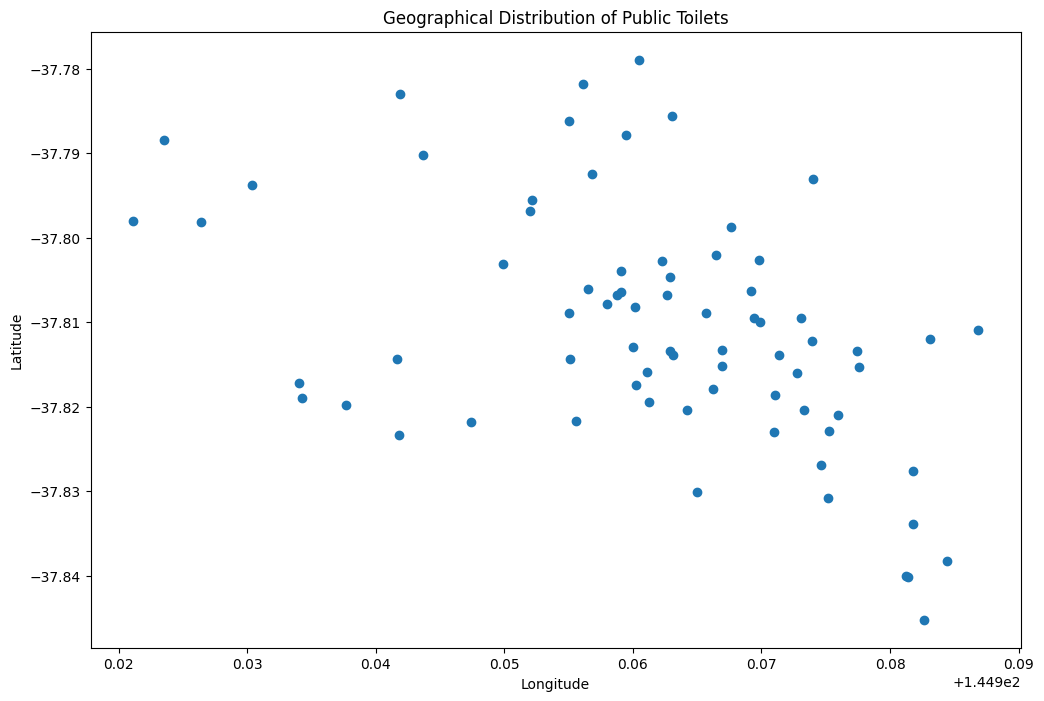

In [178]:
# Location distribution
plt.figure(figsize=(12, 8))
plt.scatter(toilets_df['lon'], toilets_df['lat'])
plt.title('Geographical Distribution of Public Toilets')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Finding out the locations which needs improvement the most

In [180]:
# Calculate a 'facility_score' for each location
toilets_df['facility_score'] = toilets_df['female'] + toilets_df['male'] + toilets_df['wheelchair']

# Sort the DataFrame by facility_score in ascending order and select the top 5
needs_improvement = toilets_df.sort_values('facility_score').head(5)

# Display the results
print("5 locations with least facilities:")
print(needs_improvement[['name', 'female', 'male', 'wheelchair', 'facility_score']])

5 locations with least facilities:
                                                 name  female  male  \
61   Public Toilet - Ron Barassi Senior Park Pavilion       0     0   
0   Public Toilet - Toilet 140 - Queensberry Stree...       1     2   
37  Public Toilet - Toilet 102 - Fawkner Park, Nor...       2     1   
52  Public Toilet - Toilet 14 - Flinders Street (2...       1     2   
27  Public Toilet - Toilet 102 - Fawkner Park, Nor...       1     2   

    wheelchair  facility_score  
61           0               0  
0            1               4  
37           1               4  
52           1               4  
27           1               4  
